## 模拟退火算法

#### 流程图
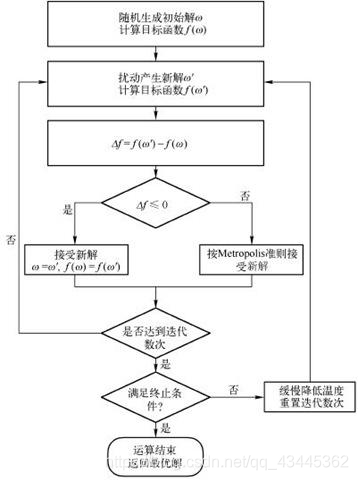  

### 过程


模拟退火（Simulated Annealing, SA）算法是一种基于物理退火过程的全局优化算法。在物理退火过程中，材料被加热到高温，然后逐渐冷却以达到最低能量状态。模拟退火算法通过模拟这一物理过程来解决优化问题，特别适用于复杂的多峰函数优化。

#### 1. 初始设置

首先，选择初始温度$ T_0 $，设定最终温度 $T_f$，并确定降温因子 $\alpha$。同时，随机生成初始解 (x, y)。

#### 2. 目标函数

我们定义目标函数  f(x, y)  如下：

$ f(x, y) = - \left( \frac{6.452 \cdot (x + 0.125 \cdot y) \cdot (\cos(x) - \cos(2y))^2}{\sqrt{0.8 + (x - 4.2)^2 + 2 \cdot (y - 7)^2}} + 3.226 \cdot y \right) $

此目标函数需要被最小化，因此在模拟退火过程中，我们通过负号将其转换为最大化问题。

#### 3. 生成新解

在每一温度下，算法生成一个新的解 \( (x_{\text{new}}, y_{\text{new}}) \)：

$ x_{\text{new}} = x + T \cdot (\text{random()} - \text{random()}) $

$ y_{\text{new}} = y + T \cdot (\text{random()} - \text{random()}) $

这个过程通过在当前解附近随机扰动来生成新解。

#### 4. Metropolis 准则

Metropolis 准则决定是否接受新解：

- 如果新解的目标函数值 $ f_{\text{new}} $更小（更优），则接受新解。
- 否则，以概率$ p $接受新解：


$ p = \exp\left(\frac{f - f_{\text{new}}}{T}\right) $


这种机制允许算法跳出局部最优，增加找到全局最优解的机会。

#### 5. 降温过程

每次迭代后，温度按照以下公式降低：

$T_{\text{new}} = \alpha \cdot T $

当温度降到设定的最终温度 $ T_f $时，算法停止。


在经典的模拟退火算法中，通常我们将 `K_B` 设置为 1，因为我们可以把温度 `T` 和 `K_B` 的乘积视为一个新的温度。因此，·`p = math.exp((f - f_new) / self.T)` 是可以接受的，并且简化了实现过程。

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# 求目标函数的最大值
def func(x, y):
    num = 6.452 * (x + 0.125 * y) * (math.cos(x) - math.cos(2 * y)) ** 2
    den = math.sqrt(0.8 + (x - 4.2) ** 2 + 2 * (y - 7) ** 2)
    return - (num / den + 3.226 * y)


class SimulateAnnealing:
    def __init__(self, func, iter=10, T0=100, Tf=1e-8, alpha=0.99):
        """
        Annealing parameters
        :param iter: Number of internal cycles
        :param T0: Initial temperature
        :param Tf: Final temperature
        :param alpha: Cooling factor
        """
        self.func = func
        self.iter = iter
        self.alpha = alpha
        self.T0 = T0
        self.Tf = Tf
        self.T = T0
        self.x = [random.random() * 10 for i in range(iter)]
        self.y = [random.random() * 10 for i in range(iter)]
        self.history = {'f': [], 'T': []}
    
    # 扰动产生新解
    def generate_new(self, x, y):
        while True:
            x_new = x + self.T * (random.random() - random.random())
            y_new = y + self.T * (random.random() - random.random())
            if (0 <= x_new <= 10) & (0 <= y_new <= 10):
                break
        return x_new, y_new
    
    # Metropolis准则
    def Metrospolis(self, f, f_new):
        if f_new <= f:
            return 1
        else:
            p = math.exp((f - f_new) / self.T)
            if random.random() < p:
                return 1
            else:
                return 0
    
    # 获取最优目标函数值
    def get_optimal(self):
        f_list = []
        for i in range(self.iter):
            f = self.func(self.x[i], self.y[i])
            f_list.append(f)
        f_best = min(f_list)
        idx = f_list.index(f_best)
        return - f_best, idx
    
    def run(self):
        count = 0
        # annealing
        while self.T > self.Tf:
            # iteration
            for i in range(self.iter):
                f = self.func(self.x[i], self.y[i])
                x_new, y_new = self.generate_new(self.x[i], self.y[i])
                f_new = self.func(x_new, y_new)
                if self.Metrospolis(f, f_new):
                    self.x[i] = x_new
                    self.y[i] = y_new
            # save to history
            ft, _ = self.get_optimal()
            self.history['f'].append(ft)
            self.history['T'].append(self.T)
            # cooling
            self.T = self.T * self.alpha
            count += 1
        # get optimal solution
        f_best, idx = self.get_optimal()
        print(f"F={f_best}, x={self.x[idx]}, y={self.y[idx]}")

    def plot(self):
        fig, ax1 = plt.subplots()

        ax1.plot(self.history['T'], self.history['f'], 'b-')
        ax1.set_xlabel('Temperature')
        ax1.set_ylabel('Function Value', color='b')
        ax1.invert_xaxis()  # Invert the x-axis to show cooling

        plt.title('Simulated Annealing Optimization')
        plt.show()

if __name__ == '__main__':
    # run
    sa = SimulateAnnealing(func)
    sa.run()
    # plot
    sa.plot()